In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

For NOAA Climate Dataset

In [3]:
df_climate = pd.read_csv('climate.csv')

In [6]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652169 entries, 0 to 652168
Data columns (total 6 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date                            652169 non-null  object 
 1   Quarter                         652169 non-null  object 
 2   DailyAverageWindSpeed           17734 non-null   float64
 3   DailyAverageRelativeHumidity    4567 non-null    float64
 4   DailyAverageDryBulbTemperature  17359 non-null   float64
 5   DailyPeakWindDirection          17580 non-null   float64
dtypes: float64(4), object(2)
memory usage: 29.9+ MB


In [5]:
df_climate['DailyAverageDryBulbTemperature'] = pd.to_numeric(df_climate['DailyAverageDryBulbTemperature'], errors='coerce')
df_climate['DailyPeakWindDirection'] = pd.to_numeric(df_climate['DailyPeakWindDirection'], errors='coerce')

In [7]:
total = len(df_climate)
null = df_climate.isnull().sum()
populated_data = total-null
print(populated_data)

Date                              652169
Quarter                           652169
DailyAverageWindSpeed              17734
DailyAverageRelativeHumidity        4567
DailyAverageDryBulbTemperature     17359
DailyPeakWindDirection             17580
dtype: int64


For the simulation we have a grid of 25x25 cells, which indicates we need atleast 625 values for climate variables to successfully simulate the wildfires.
Out of 652169 rows in the climate data, we have sufficient values for the climate variables to be able to simulate the project.

In [9]:
features = [
    'DailyAverageDryBulbTemperature',
    'DailyAverageRelativeHumidity',
    'DailyAverageWindSpeed',
    'DailyPeakWindDirection'
]

In [42]:
def plot_quarterly_climate_distributions(data, quarter):

    df_q = df_climate[df_climate['Quarter'] == quarter]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    sns.histplot(df_q['DailyAverageWindSpeed'], ax=axes[0, 0])
    axes[0, 0].set_title(f'{features[0]}  ({quarter})')
    axes[0, 0].set_xlabel(features[0])
    axes[0, 0].set_ylabel('Count')

    sns.histplot(df_q['DailyPeakWindDirection'], ax=axes[0, 1])
    axes[0, 1].set_title(f'{features[1]} ({quarter})')
    axes[0, 1].set_xlabel(features[1])
    axes[0, 1].set_ylabel('Count')

    sns.histplot(df_q['DailyAverageRelativeHumidity'], ax=axes[1, 0])
    axes[1, 0].set_title(f'{features[2]} ({quarter})')
    axes[1, 0].set_xlabel(features[2])
    axes[1, 0].set_ylabel('Count')

    sns.histplot(df_q['DailyAverageDryBulbTemperature'], ax=axes[1, 1])
    axes[1, 1].set_title(f'{features[3]} ({quarter})')
    axes[1, 1].set_xlabel(features[3])
    axes[1, 1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

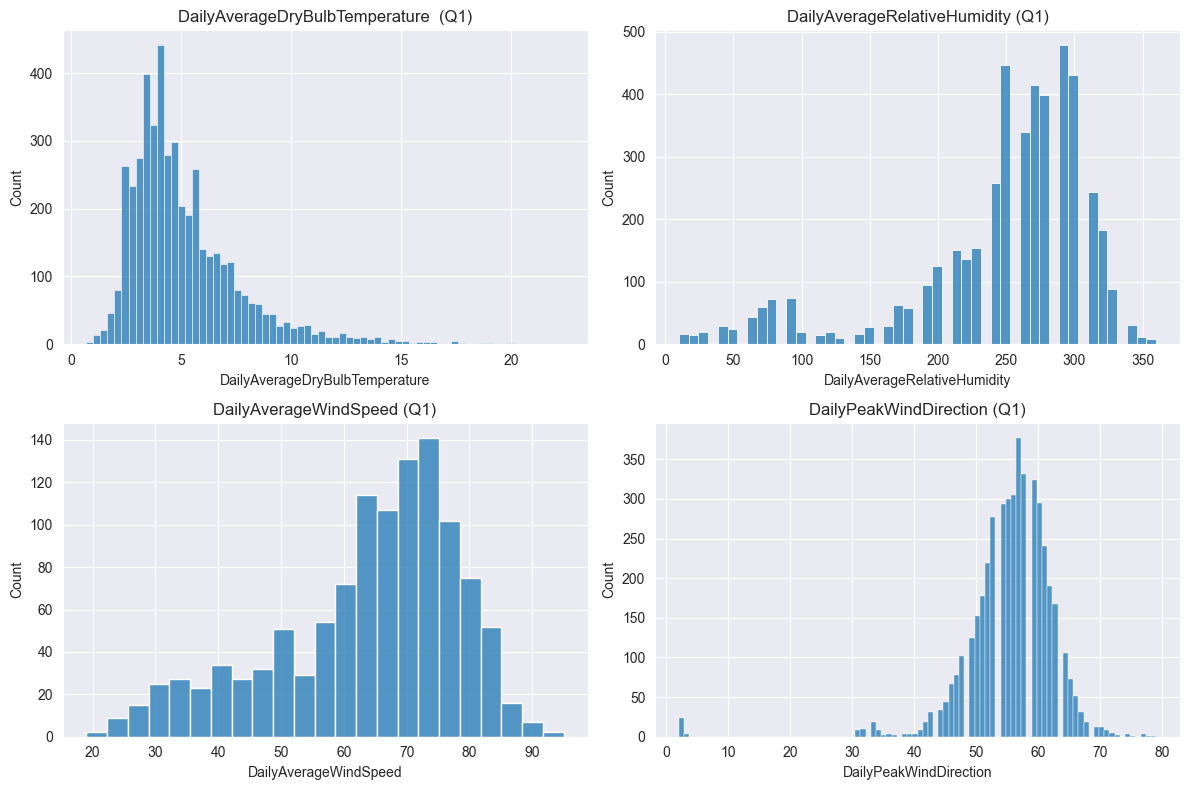

In [41]:
plot_quarterly_climate_distributions(df_climate, 'Q1')

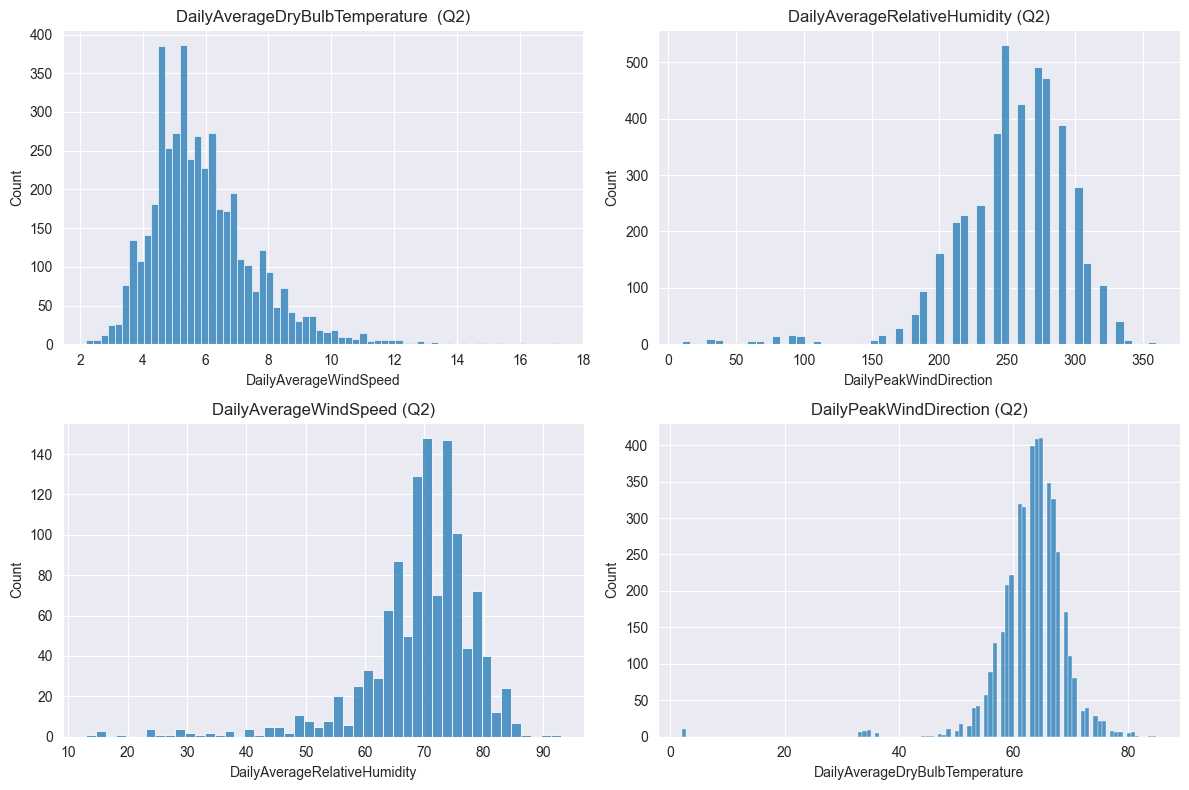

In [39]:
plot_quarterly_climate_distributions(df_climate, 'Q2')

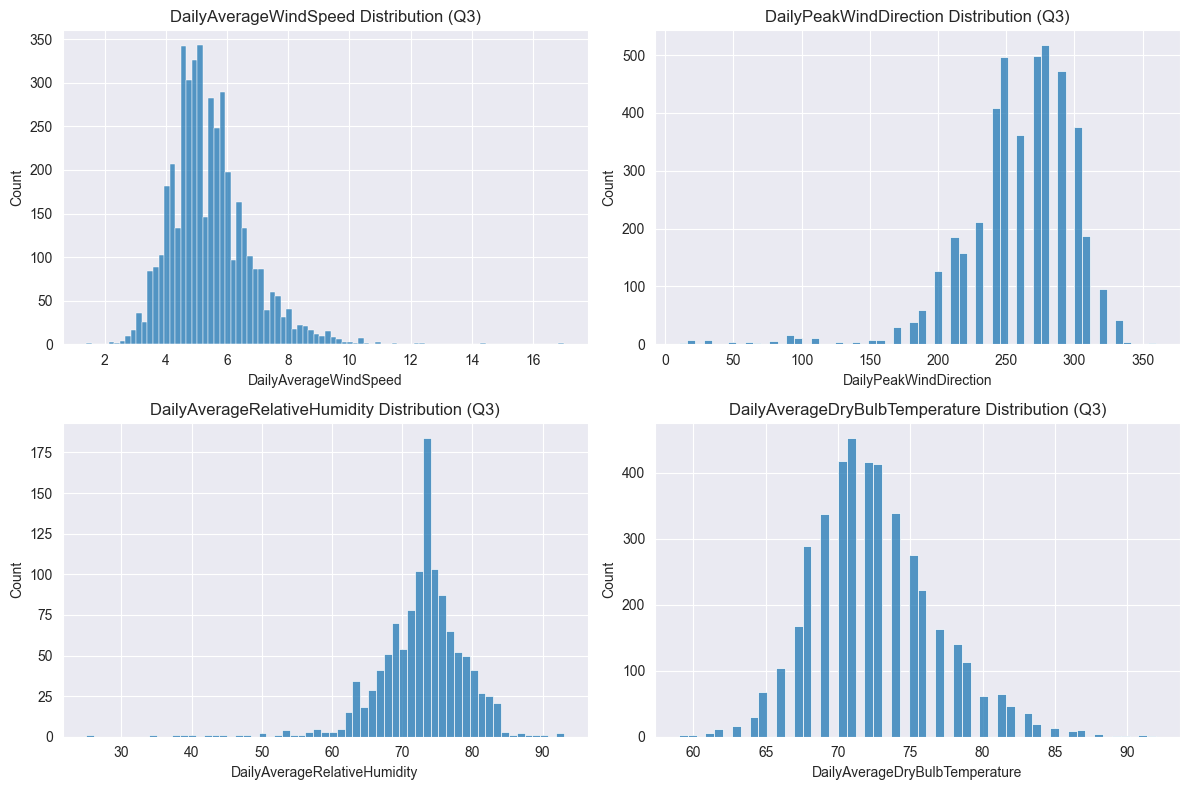

In [27]:
plot_quarterly_climate_distributions(df_climate, 'Q3')

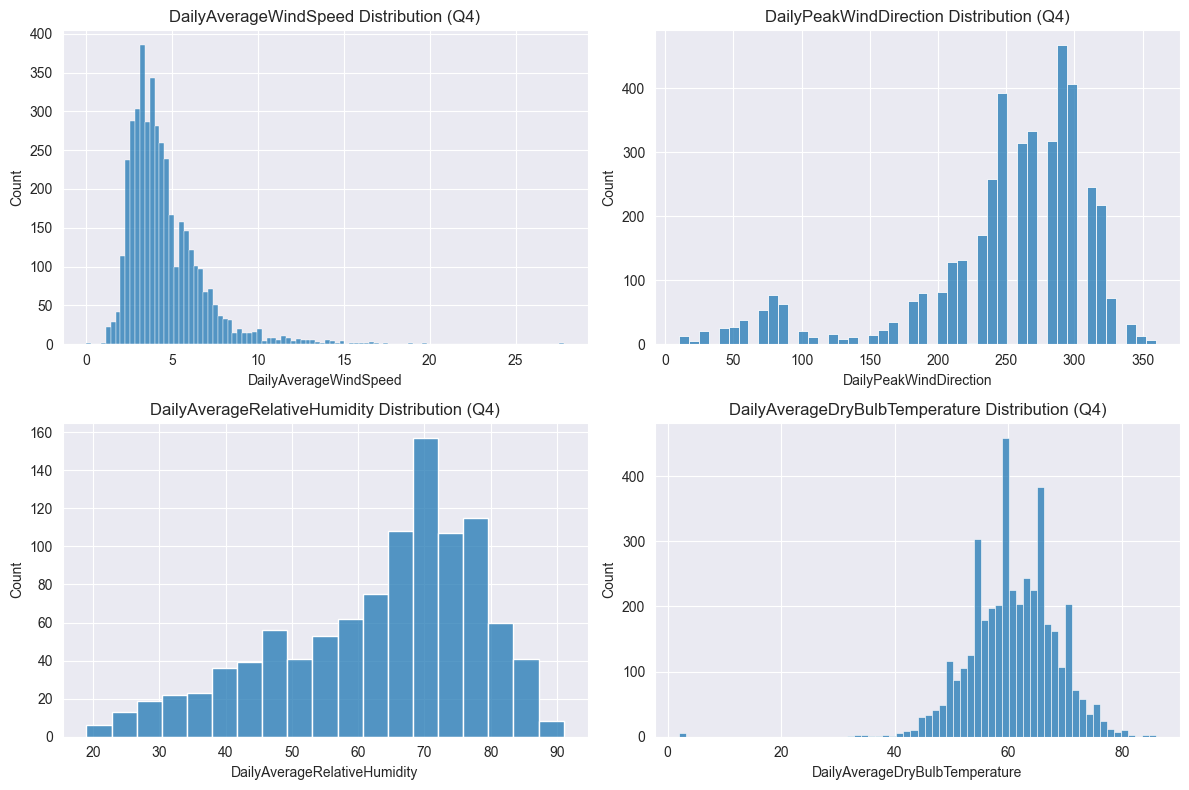

In [28]:
plot_quarterly_climate_distributions(df_climate, 'Q4')

In [35]:
def climate_boxplots(data):

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    sns.boxplot(data=df_climate, x='Quarter', y=features[0], ax=axes[0, 0])
    axes[0, 0].set_title(f'{features[0]} by Quarter')
    axes[0, 0].set_xlabel('Quarter')
    axes[0, 0].set_ylabel(features[0])

    sns.boxplot(data=df_climate, x='Quarter', y=features[1], ax=axes[0, 1])
    axes[0, 1].set_title(f'{features[1]} by Quarter')
    axes[0, 1].set_xlabel('Quarter')
    axes[0, 1].set_ylabel(features[1])

    sns.boxplot(data=df_climate, x='Quarter', y=features[2], ax=axes[1, 0])
    axes[1, 0].set_title(f'{features[2]} by Quarter')
    axes[1, 0].set_xlabel('Quarter')
    axes[1, 0].set_ylabel(features[2])

    sns.boxplot(data=df_climate, x='Quarter', y=features[3], ax=axes[1, 1])
    axes[1, 1].set_title(f'{features[3]} by Quarter')
    axes[1, 1].set_xlabel('Quarter')
    axes[1, 1].set_ylabel(features[3])

    plt.tight_layout()
    plt.show()

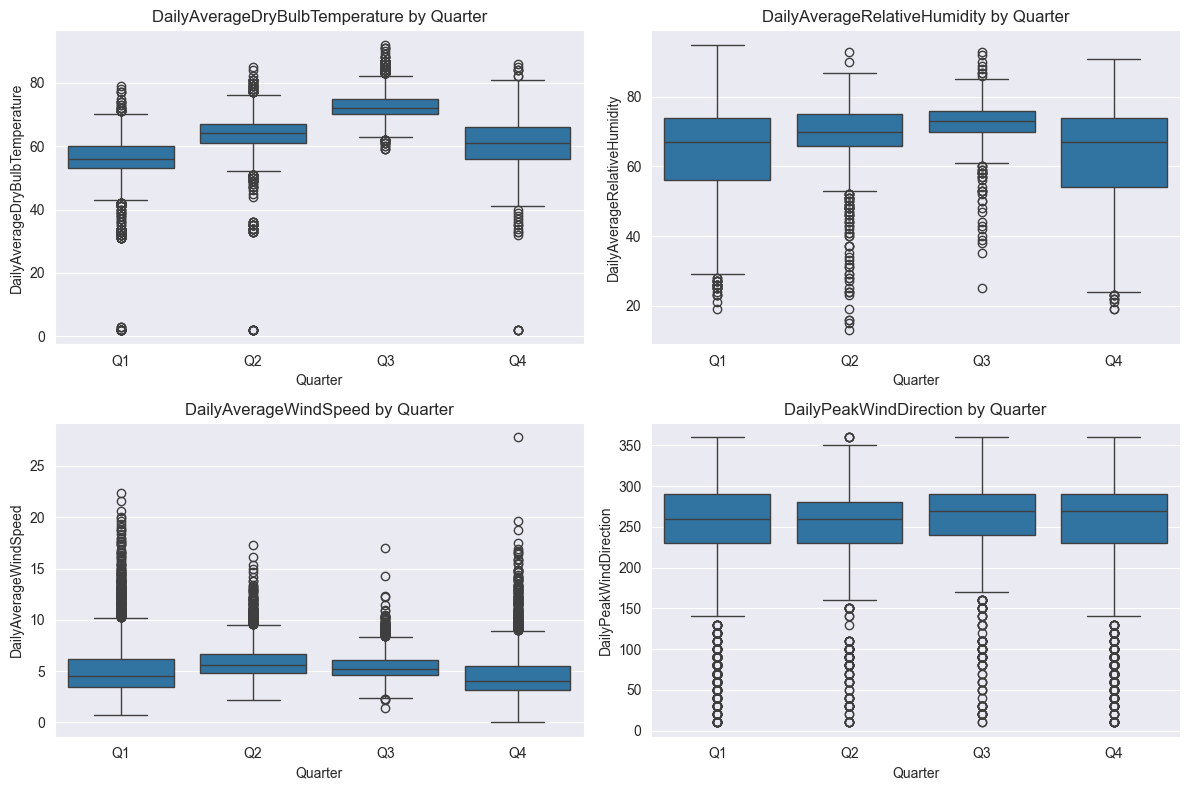

In [36]:
climate_boxplots(df_climate)

In [49]:
def plot_fires_trend(fire_npy_grid, fire_data):

   fire_occurences_grid = np.load(fire_npy_grid)

    region_data = pd.read_csv(fire_data)
    region_data['acq_date'] = pd.to_datetime(region_data['acq_date'])
    years = sorted(region_data['acq_date'].dt.year.unique())

    if fire_occurences_grid.shape[0] != len(years):
        print("Warning: mismatch between number of years and array shape")

    fire_counts = fire_occurences_grid.reshape(fire_occurences_grid.shape[0], -1).sum(axis=1)

    plt.figure(figsize=(8,4))
    plt.plot(years, fire_counts, marker='o', linestyle='-')
    plt.title('Yearly Fire Occurence Trends')
    plt.xlabel('Year')
    plt.ylabel('Number of Grid Cells with Fire')
    plt.grid(True)
    plt.show()

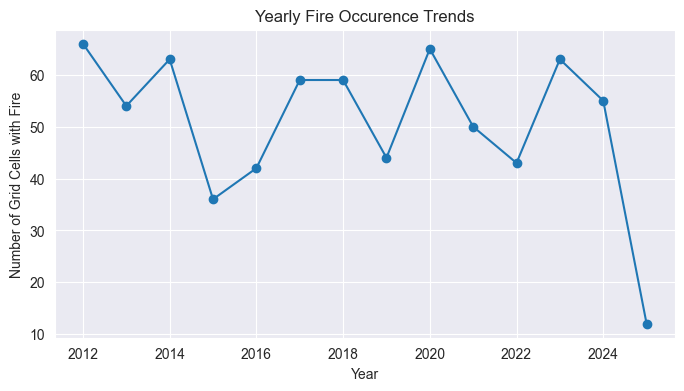

In [50]:
plot_fires_trend(
    fire_npy_grid='fire_presence_yearly_25x25_southeast_us.npy',
    fire_data='NASA_FIRMS.csv'
)

Data for 2025 is incomplete due to limited availability hence we see a sharp dip in the number of grid cells with fire per year.